![Astrofisica Computacional](../../new_logo.png)

3. Setup: Importing Python Libraries\
    We utilize numpy for high-performance vectorized numerical operations and matplotlib for scientific visualization.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

4. Implementation: Finite Difference Schemes\
    We implement the schemes as Python functions. Note that these functions are designed to support NumPy broadcasting; if h or x is an array, the function returns an array of results without requiring explicit loops.

In [4]:
def forward_diff(f, x, h):
    """
    Computes the Forward Difference D+.
    f: callable function
    x: float or np.ndarray, evaluation point(s)
    h: float or np.ndarray, step size(s)
    """
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
    """
    Computes the Backward Difference D-.
    f: callable function
    x: float or np.ndarray, evaluation point(s)
    h: float or np.ndarray, step size(s)
    """
    return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
    """
    Computes the Centered Difference D0.
    f: callable function
    x: float or np.ndarray, evaluation point(s)
    h: float or np.ndarray, step size(s)
    """
    return (f(x + h) - f(x - h)) / (2 * h)

5. Practical Example: f(x) = \sin(x)

Let us evaluate these approximations for $f(x) = \sin(x)$ at $x_0 = 1.0$ (expressed in radians). The analytical derivative is $f'(x) = \cos(x)$, providing an exact baseline: $f'(1.0) \approx 0.540302$.

| Step Size (h) | Forward Error | Backward Error | Centered Error |
|---|---|---|---|
| 0.100 | 0.042939 | 0.041138 | 9.000537e-04 |
| 0.050 | 0.021257 | 0.020807 | 2.250978e-04 |
| 0.010 | 0.004216 | 0.004198 | 9.004993e-06 |
| 0.005 | 0.002106 | 0.002101 | 2.251257e-06 |
| 0.001 | 0.000421 | 0.000421 | 9.005045e-08 |


In [5]:
h_vals = np.array([0.1, 0.05, 0.01, 0.005, 0.001])
x0 = 1.0
f = np.sin
exact = np.cos(x0)

# Computing errors (utilizing vectorization for performance)
err_f = np.abs(exact - forward_diff(f, x0, h_vals))
err_b = np.abs(exact - backward_diff(f, x0, h_vals))
err_c = np.abs(exact - centered_diff(f, x0, h_vals))


6. Visualization: Error Analysis (Log-Log Plot)

To verify the order of accuracy, we analyze the relationship $E(h) \approx Ch^p$. In logarithmic space, this becomes $\log(E) \approx p\log(h) + \log|C|$. The slope p on a log-log plot directly indicates the order of accuracy.

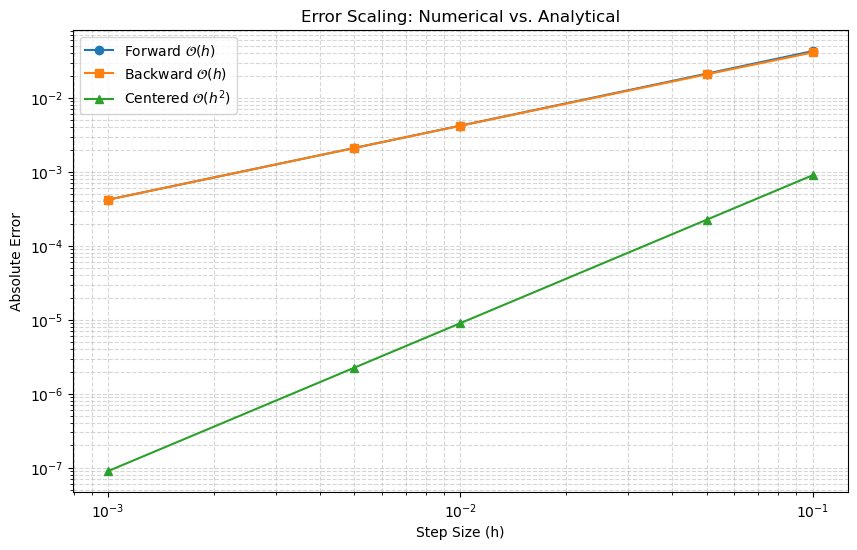

In [6]:
plt.figure(figsize=(10, 6))
plt.loglog(h_vals, err_f, '-o', label=r'Forward $\mathcal{O}(h)$')
plt.loglog(h_vals, err_b, '-s', label=r'Backward $\mathcal{O}(h)$')
plt.loglog(h_vals, err_c, '-^', label=r'Centered $\mathcal{O}(h^2)$')
plt.xlabel('Step Size (h)')
plt.ylabel('Absolute Error')
plt.title('Error Scaling: Numerical vs. Analytical')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

Analyzing the slopes:

* Slope $\approx 1$: Confirms first-order accuracy $\mathcal{O}(h)$ for Forward and Backward schemes.
* Slope $\approx 2$: Confirms second-order accuracy $\mathcal{O}(h^2)$ for the Centered scheme.

7. Student Exercise: Second-Order Derivatives

We can extend the Taylor series method to approximate higher-order derivatives.

Derivation Skeleton: Consider the sum of the expansions for $f(x+h) and f(x-h)$:\
$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + \mathcal{O}(h^4) f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + \mathcal{O}(h^4)$\
By adding these two equations, notice how the odd-powered terms ($hf'$ and $\frac{h^3}{6}f''')$ cancel out:\
$f(x+h) + f(x-h) = 2f(x) + h^2f''(x) + \mathcal{O}(h^4)$

EXERCISE Task 1: Using the derivation above, isolate f''(x) and implement a Python function second_order_diff(f, x, h) based on the resulting formula:\ 
$f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}$

EXERCISE Task 2: Verify the order of accuracy for f(x) = \sin(x) where the analytical second derivative is $f''(x) = -\sin(x)$. Plot the error on a log-log scale and use np.polyfit on the log-transformed data to calculate the exact slope. Does it equal 2?

8. References

* Leveque, R. J. (2007). Finite Difference Method for Ordinary and Partial Differential Equations: Steady State and Time-Dependent Problems. Society for Industrial and Applied Mathematics (SIAM), Philadelphia.
* Saad, Y. (2000). Iterative Methods for Sparse Linear Systems. PWS/ITP 1996. Online: http://www-users.cs.umn.edu/~saad/books.html.
* Burden, R., & Faires, J. D. (2010). Numerical Analysis. Cengage Learning; 9th edition.

## Solution to exercises

### Exercise 1

Considering that 

$$
f(x+h) + f(x-h) = 2f(x) + h^2f''(x) + \mathcal{O}(h^4)
$$

We can easily get 

$$
2 h^2 f''(x) = f(x+h) - 2f(x) + f(x-h) $$
$$
f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{2h^2}
$$

The `python` implementation follows

In [7]:
def second_order_diff(f, x, h):
    return (f(x+h) - 2*f(x) + f(x-h)) / (2 * h**2)

### Exercise 2

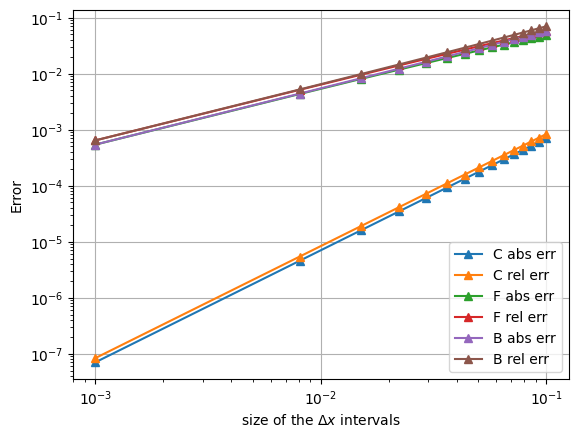

In [12]:
import matplotlib.pyplot as plt


x0 = 1.0
fun = np.sin 
SOD_fun = lambda x: -1.0 * np.sin(x) 



def abs_err(Fex, Fnum, dx, x=x0):
    return np.abs( Fex(x) - Fnum(dx, x) )

def rel_err(Fex, Fnum, dx, x=x0):
    return np.abs( ( Fex(x) - Fnum(dx, x) ) / Fex(x))

def second_OD(F, x, dx):
    return ( F(x+dx) - 2.0*F(x) + F(x-dx) ) / (dx**2)

def second_OD_F(F, x, dx):
    return ( F(x) - 2.0*F(x + 1.0*dx) + F(x + 2.0*dx) ) / (dx**2)

def second_OD_B(F, x, dx):
    return ( F(x) - 2.0*F(x - 1.0*dx) + F(x - 2.0*dx) ) / (dx**2)



dxs = np.linspace(0.001, 0.1, 15)




abs_errors = abs_err(SOD_fun, lambda dx, x: second_OD(fun, x, dx), dxs)
rel_errors = rel_err(SOD_fun, lambda dx, x: second_OD(fun, x, dx), dxs)

F_abs_errors = abs_err(SOD_fun, lambda dx, x: second_OD_F(fun, x, dx), dxs)
F_rel_errors = rel_err(SOD_fun, lambda dx, x: second_OD_F(fun, x, dx), dxs)

B_abs_errors = abs_err(SOD_fun, lambda dx, x: second_OD_B(fun, x, dx), dxs)
B_rel_errors = rel_err(SOD_fun, lambda dx, x: second_OD_B(fun, x, dx), dxs)



plt.loglog(dxs, abs_errors, '-^', label = "C abs err")
plt.loglog(dxs, rel_errors, '-^', label = 'C rel err')

plt.loglog(dxs, F_abs_errors, '-^', label = "F abs err")
plt.loglog(dxs, F_rel_errors, '-^', label = 'F rel err')

plt.loglog(dxs, B_abs_errors, '-^', label = "B abs err")
plt.loglog(dxs, B_rel_errors, '-^', label = 'B rel err')

plt.xlabel(r"size of the $\Delta x$ intervals")
plt.ylabel(r"Error")

plt.legend()
plt.grid()

plt.show()

